<a href="https://colab.research.google.com/github/Suraj-Sedai/Customer-Churn-Analysis/blob/main/notebook/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Bank Customer Churn Analysis</h1>

<h4>Importing the dataset</h4>

In [110]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Customer-Churn-Records.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<h6>Checking for missing values & preparing dataset</h6>

In [111]:
df.isnull().sum()   # check for missing values

#df.describe()   # summary statistics

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [112]:
df = df.dropna()   # drop missing values

##or fill missing values with mean
#df = df.fillna(df.mean())

<h5>Revoming unnecessary columns</h5>

In [113]:
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming df is already loaded)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)  # Drop irrelevant columns

# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows after scaling
print(df.head())

#displaying only numerical columns
print(df[num_cols].head())

   CreditScore Geography  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221    France  Female  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036     Spain  Female  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794    France  Female  0.293517  1.032908  1.333053       2.527057   
3     0.501521    France  Female  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884     Spain  Female  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited  Complain  \
0   0.646092        0.970243         0.021886  1.976555  1.972908   
1  -1.547768        0.970243         0.216534 -0.505931  1.972908   
2   0.646092       -1.030670         0.240687  1.976555  1.972908   
3  -1.547768       -1.030670        -0.108918 -0.505931 -0.506866   
4   0.646092        0.970243        -0.365276 -0.505931 -0.506866   

   Satisfaction Score Card Type  Point Earned  
0           -0.721130   DIAMOND     -0.630839  
1 

<h4>Split the dataset</h4>

In [114]:
#split the dataset

from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df[num_cols].drop('Exited', axis=1)   #drop the target column exited
y = df[num_cols]['Exited']        #target column

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
y_test = np.round(y_test)  # Round values to 0/1 for classification
y_train = np.round(y_train)  # Convert to 0/1 if binary classification

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(8000, 11) (2000, 11) (8000,) (2000,)


<h4>Train Classification Using Different Models</h4>

In [115]:
# #logistic regression
# from sklearn.linear_model import LogisticRegression

# #using logistic regression
# log_reg = LogisticRegression()

# # Fit the model
# log_reg.fit(x_train, y_train)

# y_pred = log_reg.predict(x_test)

# # Accuracy
# accuracy = log_reg.score(x_test, y_test)
# print(f'Accuracy: {accuracy*100:.2f}%')

# # # Confusion Matrix
# # from sklearn.metrics import confusion_matrix
# # confusion_matrix(y_test, y_pred)
# # # print(confusion_matrix(y_test, y_pred))


#train the dataset using randomforest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf.fit(x_train, y_train)

# Predict
y_pred = rf.predict(x_test)

# Accuracy
accuracy = rf.score(x_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')



Accuracy: 99.95%


<h4>Evaluate Model</h4>

In [116]:
# Predict on test data using
y_pred = log_reg.predict(x_test)

# Display the first few predictions
print(y_pred[:5])
# Display the first few actual values
print('test values')
print(y_test[:5])

#using confusion matrix
print('confusion matrix:\n')
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

#using classification report
print('\nclassification report:\n')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[-1.  2. -1. -1. -1.]
test values
9394   -1.0
898     2.0
2398   -1.0
5906   -1.0
2343   -1.0
Name: Exited, dtype: float64
confusion matrix:

[[1595    0]
 [   1  404]]

classification report:

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1595
         2.0       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<h4>Optimize Model Performance</h4>

In [117]:
#gridsearchcv
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
params = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300, 400]}
# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), params, cv=5)
# Fit the model
grid_search.fit(x_train, y_train)

# Display the best hyperparameters
print(grid_search.best_params_)
# Display the best score
print(grid_search.best_score_)
# Display the best estimator
print(grid_search.best_estimator_)
# Predict on test data using the best model
y_pred = grid_search.best_estimator_.predict(x_test)
# Display the first few predictions
print('y_pred:\n')
print(y_pred[:5])
# Display the first few actual values
print('y_test:\n')
print(y_test[:5])

# print(x_test.shape, y_test.shape)
print('confusion matrix:\n')
#balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Fit and apply SMOTE on the training data only
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Display the shape of the training data before and after applying SMOTE
print(x_train.shape, x_train_smote.shape)



{'C': 0.1, 'max_iter': 100}
0.998375
LogisticRegression(C=0.1)
y_pred:

[-1.  2. -1. -1. -1.]
y_test:

9394   -1.0
898     2.0
2398   -1.0
5906   -1.0
2343   -1.0
Name: Exited, dtype: float64
confusion matrix:

(8000, 11) (12734, 11)


/Users/binitabudathoki/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<h4>Make Predictions</h4>

In [118]:
#make predictions
# Initialize the model wuth randomforest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf.fit(x_train_smote, y_train_smote)

# Predict
y_pred = rf.predict(x_test)

# Accuracy
accuracy = rf.score(x_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


# Display the first few predictions
print('y_pred:\n')
print(y_pred[:5])
# Display the first few actual values
print('y_test:\n')
print(y_test[:5])

#display which user is likely to churn
# Display the first few predicted probabilities
# print('predicted probabilities:\n')
# print(log_reg.predict_proba(x_test)[:5])
# # Display the first few predicted probabilities for class 1
# print('predicted probabilities for class 1:\n')
# print(log_reg.predict_proba(x_test)[:, 1][:5])
                                            
#display the customer name and disply if they are likely to churn
#like :   customer_name churn or not churn
# Display the first few customer names
print('customer names:\n')
print(df['CreditScore'].head())
# Display the first few predicted probabilities for class 1
print('predicted probabilities for class 1:\n')
print(log_reg.predict_proba(x_test)[:, 1][:5])


#plot the graph for the customer churn
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# # Get the predicted probabilities
# y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

# # Compute ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')

# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()




Accuracy: 99.95%
y_pred:

[-1.  2. -1. -1. -1.]
y_test:

9394   -1.0
898     2.0
2398   -1.0
5906   -1.0
2343   -1.0
Name: Exited, dtype: float64
customer names:

0   -0.326221
1   -0.440036
2   -1.536794
3    0.501521
4    2.063884
Name: CreditScore, dtype: float64
predicted probabilities for class 1:

[1.35646630e-04 9.99714391e-01 1.77753954e-04 1.65439356e-03
 1.76354001e-04]


In [119]:
# #show in the graph
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Count the number of observations in each class
# class_count = y_train_smote.value_counts()

# #plot the graph for the dataset
# plt.figure(figsize=(8, 6))
# sns.barplot(x=class_count.index, y=class_count.values)
# plt.title('Number of observations in each class')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

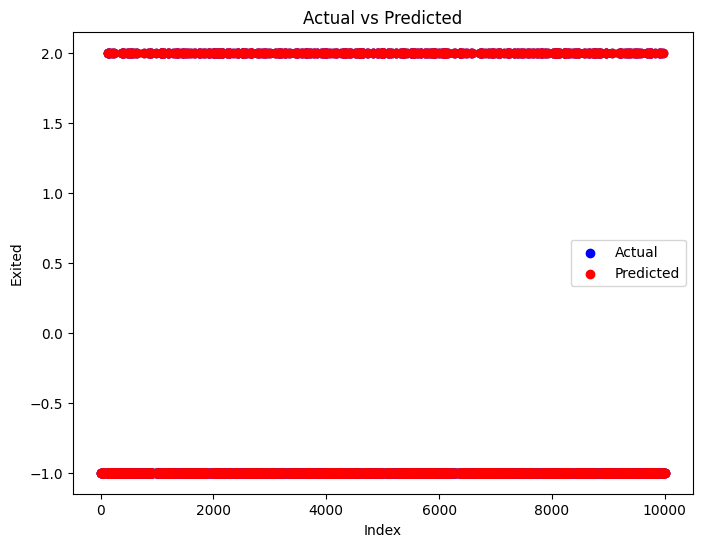

In [120]:
#graph of actual vs predicted data with different color
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.ylabel('Exited')
plt.xlabel('Index')
plt.legend()
plt.show()


<h4>Features that will affect in Churn</h4>

               Feature  Importance
8             Complain    5.512530
1                  Age    0.986040
3              Balance    0.189880
0          CreditScore    0.062588
5            HasCrCard    0.037303
7      EstimatedSalary   -0.038411
4        NumOfProducts   -0.194346
2               Tenure   -0.269966
9   Satisfaction Score   -0.343316
10        Point Earned   -0.569622
6       IsActiveMember   -0.792096


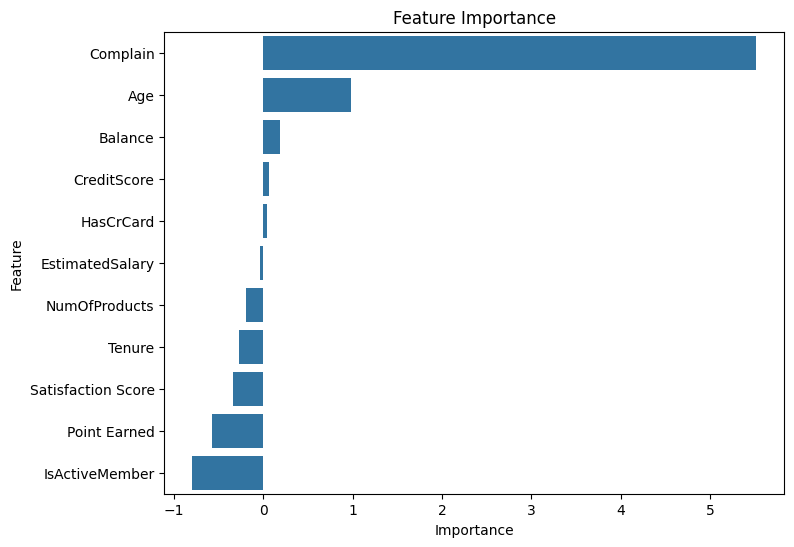

In [121]:
#display the factor that affects the customer churn
# Get the feature importance
feature_importance = log_reg.coef_[0]

# Create a DataFrame of the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the values based on the importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [122]:
#calculating the data using the confusion matrix

#creating new customer data
new_customer = pd.DataFrame({
    'CreditScore': [500],
    'Age': [20],
    'Tenure': [3],
    'Balance': [60000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000],
    'Exited': [-1],
    'Complain': [500],
    'Satisfaction Score': [5],
    'Point Earned': [3],
})
